In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2

%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [2]:
SHAPE = (137,236)

In [3]:
images = pd.read_parquet("./train_image_data_0.parquet")

In [4]:
labels = pd.read_csv("./train.csv")

In [5]:
labels_ = images.pop("image_id")

In [6]:
images = images.values

In [7]:
img = images[100].reshape(SHAPE)

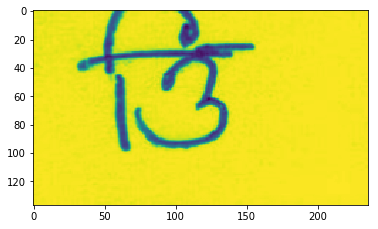

In [8]:
plt.imshow(img)

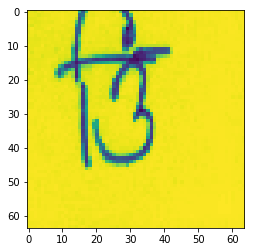

In [9]:
plt.imshow(cv2.resize(img.copy(),(64,64)))

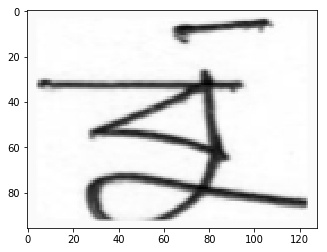

In [74]:
def crop(img,pad=True,sharpen=False,resize=(128,96)):
    img_ = img.copy()
    H,W = img_.shape
    W_THRESH = 8
    H_THRESH = 8
    PAD = 5 if pad else 0

    W_MIN,W_MAX = np.where(img.std(axis=0) > W_THRESH)[0][[0,-1]]
    H_MIN,H_MAX = np.where(img.std(axis=1) > H_THRESH)[0][[0,-1]]
    
    return cv2.resize(np.pad(img_[H_MIN:H_MAX,W_MIN:W_MAX],PAD,constant_values=250),resize)


plt.imshow(crop(images[1003].reshape(SHAPE),pad=True),cmap="gray")